# TITANIC: MACHINE LEARNING FROM DISASTER

Practice Notebook for Kaggle Data Science competitions

In [1]:
# Import al required packages
import os
wd =  os.getcwd()

import pandas as pd
import numpy as np

import seaborn as sns # Makes graphs prettier
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

%timeit
%matplotlib inline
sns.set_style('darkgrid')


In [2]:
# Read the Data
dftrain = pd.read_csv(wd + "/input/train.csv")
dftest = pd.read_csv(wd + "/input/test.csv")
df = dftrain.copy()
test = dftest.copy()

In [3]:
dftrain.info()
# dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
dftrain.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
print('Number of null values :',dftrain.isnull().sum())

Number of null values : PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print("Survival rates of MALES and FEMALES")
print("")
male1=df.loc[(df.Survived==1) & (df.Sex=='male'),:].count().PassengerId / df.PassengerId.count() * 100
print("MALE:")
print(male1,"%") 
female1=df.loc[(df.Survived==1) & (df.Sex=='female'),:].count().PassengerId / df.PassengerId.count() * 100
print("\nFEMALE:")
print(female1,'%')

Survival rates of MALES and FEMALES

MALE:
12.2334455667789 %

FEMALE:
26.15039281705948 %


In [7]:
print("Survival rate by Passenger Class")
for c in sorted(list(df.Pclass.unique())):
    rate = df.loc[(df.Survived==1) & (df.Pclass==c)].Pclass.count() / df.loc[df.Pclass==c].Pclass.count()
    print("Class {}: {}%".format(c,round(rate,3)*100))

Survival rate by Passenger Class
Class 1: 63.0%
Class 2: 47.3%
Class 3: 24.2%


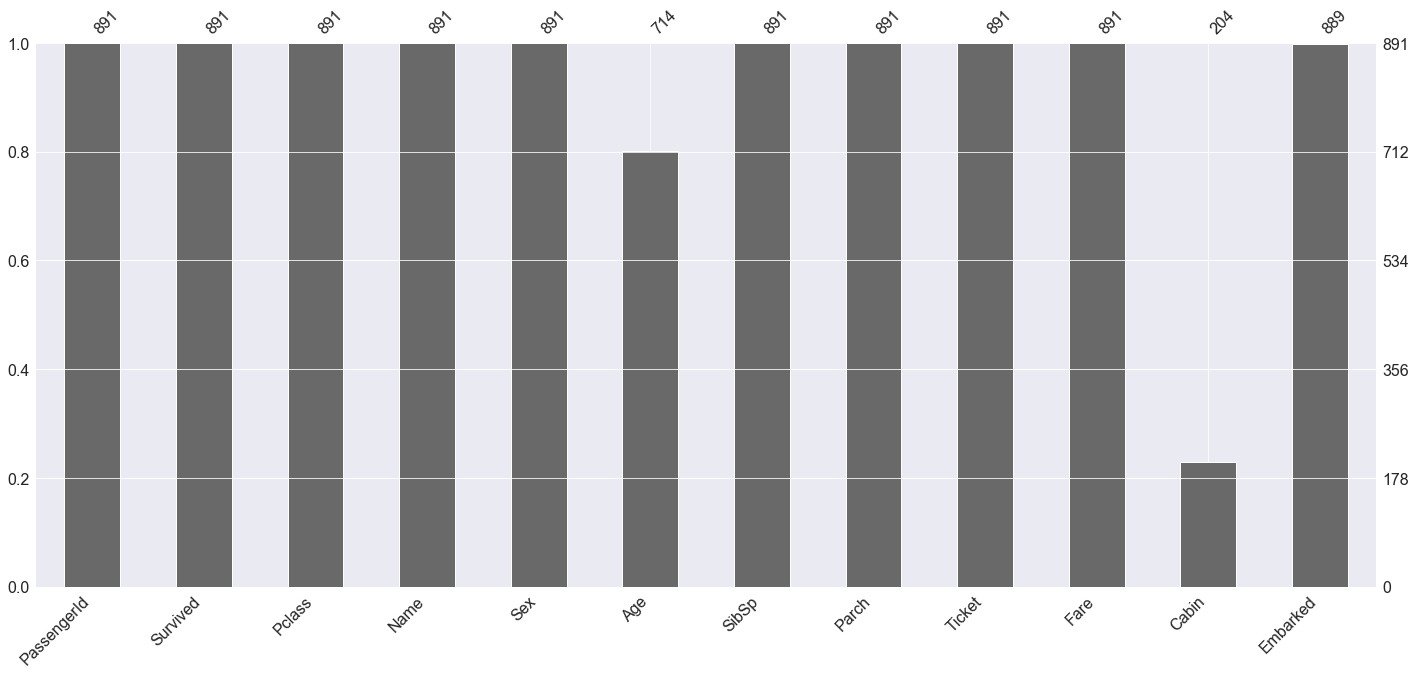

In [8]:
# Missing data
import missingno as msno
msno.bar(df)

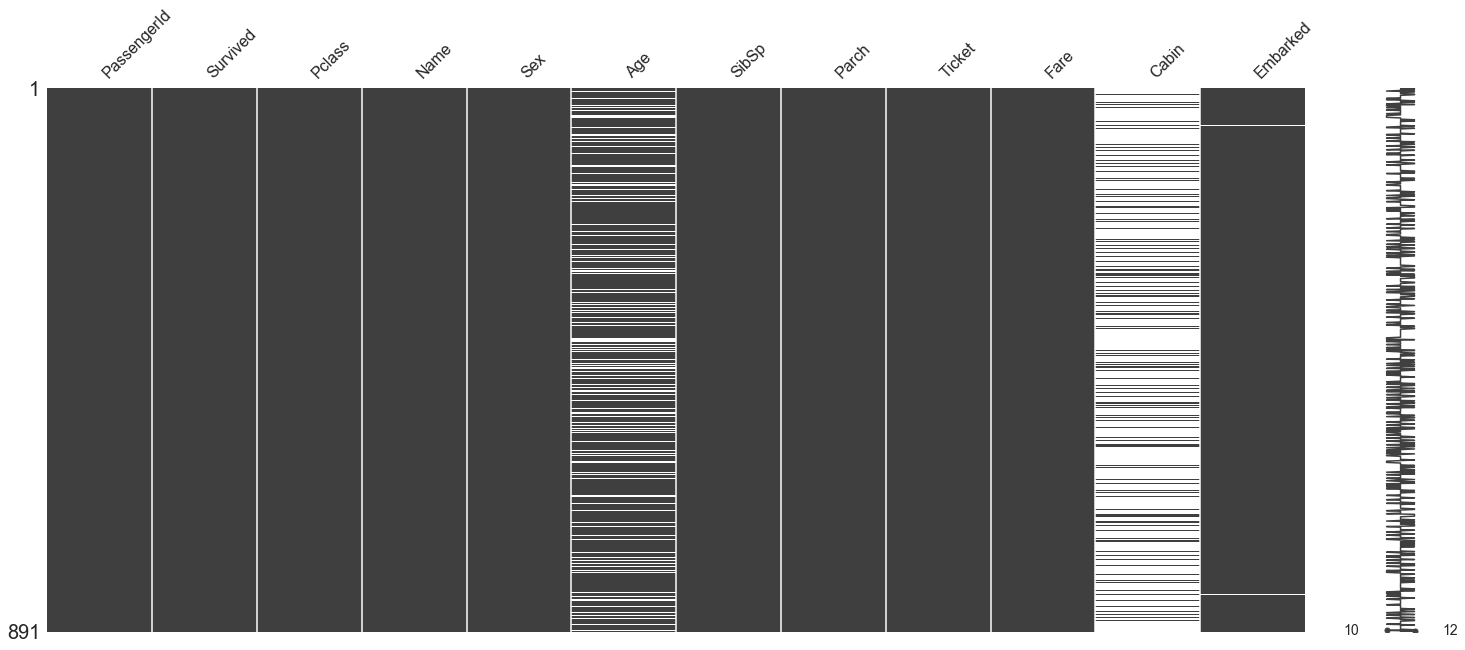

In [9]:
msno.matrix(df)

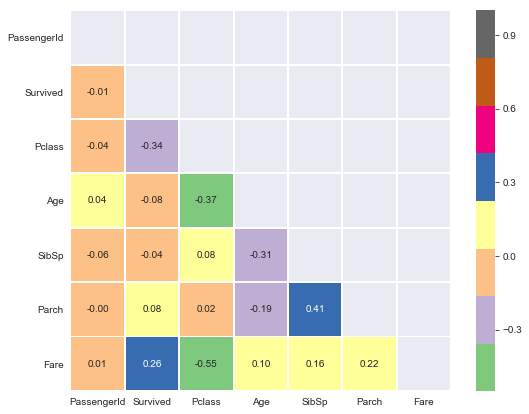

In [10]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corr, mask=mask, square = True, annot = True, cmap="Accent", robust = True, linewidths = .8, fmt = "0.2f")

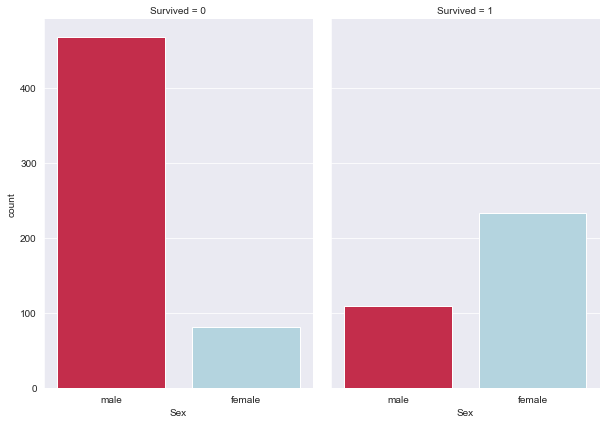

In [11]:
# Stats and Visualization of Survival Rates
sns.factorplot(x="Sex",col="Survived", data=df , kind="count",size=6, aspect=.7,palette=['crimson','lightblue'])

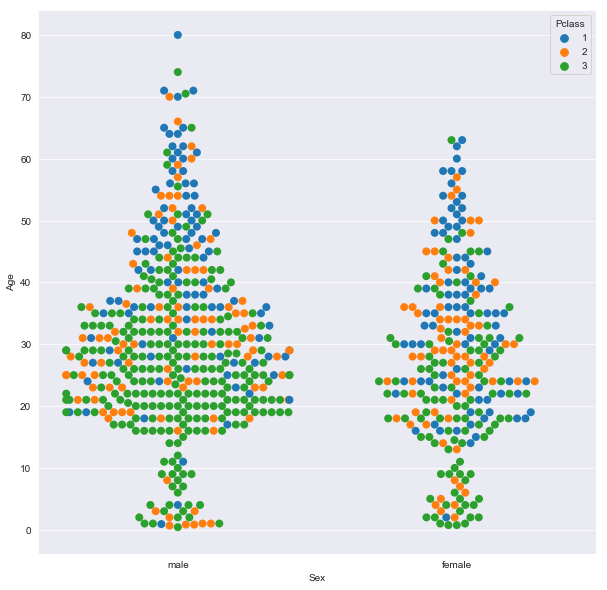

In [12]:
# Representation of Ages and to whih Passenger Class they belonged
plt.figure(figsize = (10,10))
sns.swarmplot(x="Sex", y="Age", hue='Pclass', data=df, size=8)

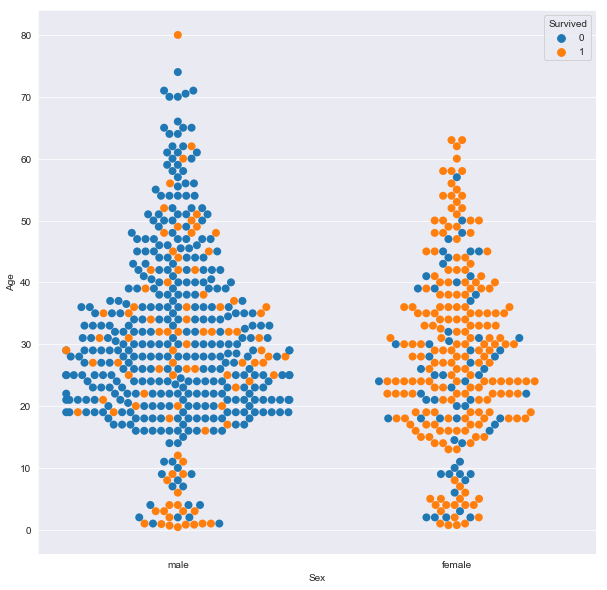

In [13]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="Sex",y="Age",hue='Survived',data=df,size=8)

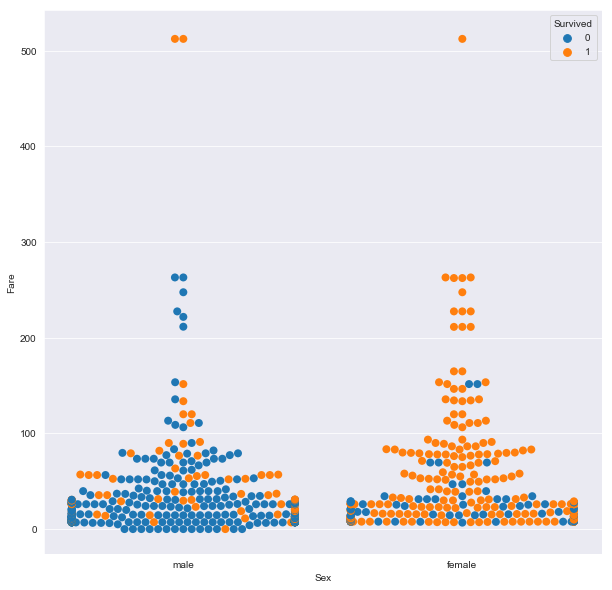

In [14]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="Sex",y="Fare",hue='Survived',data=df,size=8)

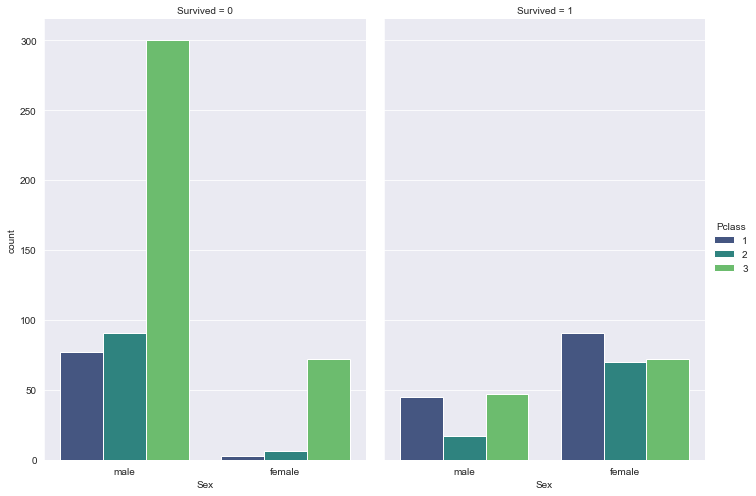

In [15]:
sns.factorplot(x="Sex", hue = "Pclass" , col="Survived", data=df , kind="count",size=7, aspect=.7,palette='viridis')

In [16]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

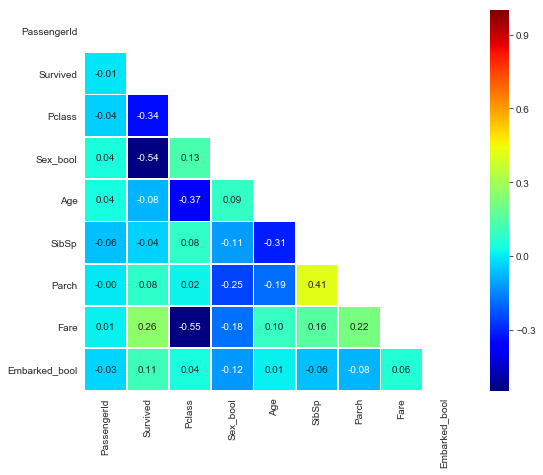

In [17]:
# Correlation Heatmap 
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
df['Sex_bool']=df.Sex.map(context1)
df["Embarked_bool"] = df.Embarked.map(context2)

corr = df[['PassengerId', 'Survived', 'Pclass', 'Sex_bool', 'Age', 'SibSp',
       'Parch', 'Fare' , 'Embarked_bool']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="jet",robust=True)


## Inferences from the above heatmap

- PassengerId is a redundant column as its very much less related to all other attributes , we can remove it .
- Also , Survived is related indirectly with Pclass and also we earlier proved that as Pclass value increases Survival decreases
- Pclass and Age are also inversely related and can also be proven by the following cell that as Pclass decreases , the mean of the Age increases , means the much of the older travellers are travelling in high class .
- Pclass and fare are also highly inversely related as the fare of Pclass 1 would obviously be higher than corresponding Pclass 2 and 3 .
- Also , people with lower ages or children are travelling with their sibling and parents more than higher aged people (following an inverse relation) , which is quite a bit obvious .
- Parch and SibSp are also highly directly related
- Sex_bool and Survived people are highly inversely related , i.e. females are more likely to survive than men



In [18]:
for x in [dftrain, dftest,df]:
    x['Age_bin']=np.nan
    for i in range(8,0,-1):
        x.loc[ x['Age'] <= i*10, 'Age_bin'] = i
df[['Age','Age_bin']].head(20)

,Age,Age_bin
0,22.0,3.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
5,NaN,NaN
6,54.0,6.0
7,2.0,1.0
8,27.0,3.0
9,14.0,2.0


<Figure size 1440x1440 with 0 Axes>

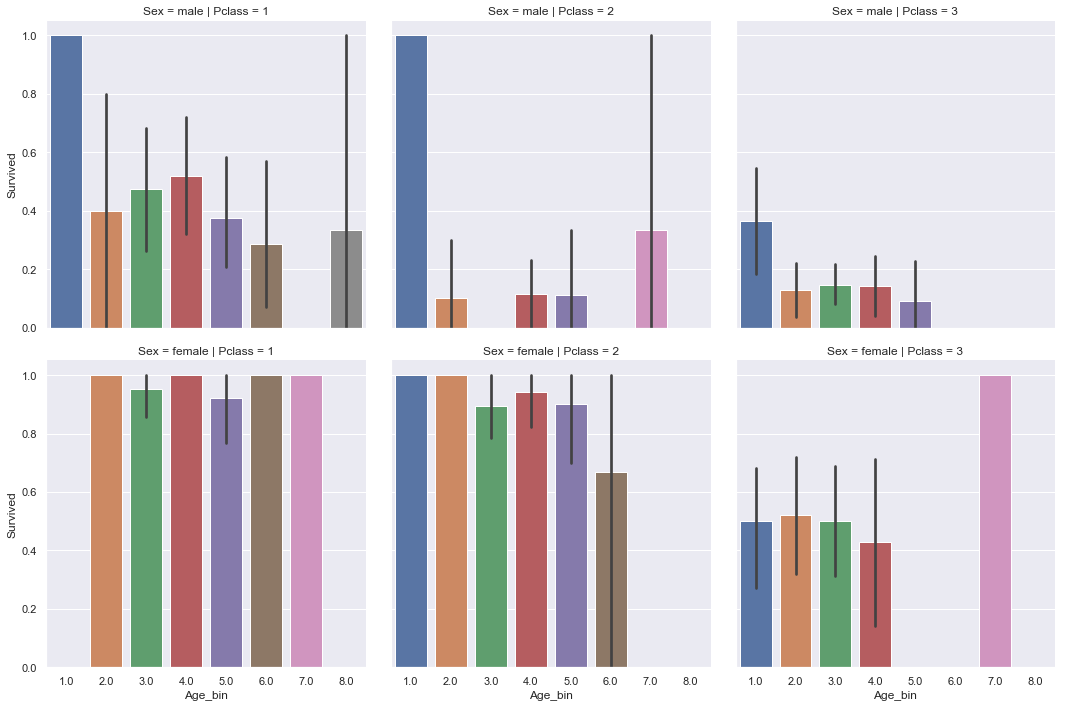

In [19]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex',kind="bar", data=df)

In [ ]:
fig, (axis1, axis2) = plt.subplot(1,2, figsize=(15,4))
axis1.set_title('Original Age values')
axis2.set_title('New Age Values')

# Plot original Age Values (Drop all NA values an convert to int)
dftrain['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

#get average, std, and number of NaN values
average_age = dftrain["Age"].mean()
std_age = dftrain["Age"].std()
count_nan_age = dftrain["Age"].isnull().sum()

#Generate random numbers between (mean-std) and (mean+std)
rand_age = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

# fill NaN Values in Age column with random values generated
age_slice = dftrain["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age

# plot iputed Age values
age_slice.astype(int).hist(bins=70, ax=axis2)